# **- Pipeline crack detection -**

# **0. Libraries**

### Installing libraries

In [1]:
print("Installing segmentation_models....")
!pip install segmentation_models --quiet
print("  -> segmentation_models installed!")

print("\n" + '\033[1m' + "Libraries correctly installed!" + '\033[0m')

Installing segmentation_models....
     |████████████████████████████████| 50 kB 6.7 MB/s 
  -> segmentation_models installed!

Libraries correctly installed!


### Importing libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import cv2
from datetime import datetime
import random

import matplotlib.pyplot as plt
import numpy as np

%env SM_FRAMEWORK = tf.keras
import segmentation_models as sm
from sklearn.model_selection import train_test_split

import tensorflow as tf

Mounted at /content/drive
env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


# **1. Auxiliar functions**

In [3]:
class printing_format:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   bold = '\033[1m'
   underline = '\033[4m'
   end = '\033[0m'

format = printing_format()

class img_storage:
  def __init__ (self, good_img, pipe_roi, crack_img, crack_pipe_roi, crack_roi):
    self.pipe_img = pipe_img
    self.pipe_roi = pipe_roi
    self.crack_img = crack_img
    self.crack_pipe_roi = crack_pipe_roi
    self.crack_roi = crack_roi

# **2. DataSet generation**

### 2.1. Import data

In [4]:
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 256

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



#### *2.1.1. Good pipes*

In [6]:
# Good images
path = "pipe_img"

files = os.listdir( path )
files = sorted( files )

pipe_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  pipe_img.append( img )

# Pipe area
path = "pipe_roi"

files = os.listdir( path )
files = sorted(files)

pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  pipe_roi.append( img )

# Generate arrays
pipe_img = np.array(pipe_img)
pipe_roi = np.array(pipe_roi)

#### *2.1.2. Cracked images*

In [7]:
# Stablish path
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/DataSet'
print()

img_size = 256

# Crack images
path = "crack_img"

files = os.listdir( path )
files = sorted( files )

crack_img = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  crack_img.append( img )

# Pipe area
path = "cracked_pipe_roi"

files = os.listdir( path )
files = sorted(files)

crack_pipe_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  crack_pipe_roi.append( img )

# Crack roi
path = "seg_train"

files = os.listdir( path )
files = sorted(files)

crack_roi = []

for file in files:

  img = cv2.imread( path + "/" + file )
  img = cv2.resize(img, (img_size, img_size), interpolation= cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  crack_roi.append( img )

# Generate arrays
crack_img      = np.array(crack_img)
crack_pipe_roi = np.array(crack_pipe_roi)
crack_roi      = np.array(crack_roi)

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/DataSet



#### *2.1.3. Save images*

In [8]:
saved = img_storage(pipe_img, pipe_roi, crack_img, crack_pipe_roi, crack_roi)

In [9]:
pipe_img       = saved.pipe_img
pipe_roi       = saved.pipe_roi
crack_img      = saved.crack_img
crack_pipe_roi = saved.crack_pipe_roi
crack_roi      = saved.crack_roi

#### *2.1.4. Sanity check*

In [10]:
%%script false

# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Pipe images:  \t" + str( saved.pipe_img.shape ) )
print("  Pipe ROI:     \t" + str( saved.pipe_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

In [11]:
%%script false

# Display data shape
print(format.bold + "\t\t-- IMAGES --" + format.end)
print("  Crack images:   \t" + str( saved.crack_img.shape ) )
print("  Crack pipe ROI: \t" + str( saved.crack_pipe_roi.shape ) )
print("  Crack ROI:      \t" + str( saved.crack_roi.shape ) )
print()

for i in range(2):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( crack_roi[index], cmap = "gray")
  plt.show()

### 2.3. Normalize values

In [12]:
# Data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t\t - " + str( crack_pipe_roi.dtype ) )
print("  Crack ROI:      \t" + str( crack_roi.shape ) + "\t\t - " + str( crack_roi.dtype ) )
print()

# Data range
index = random.randint(0, len(crack_roi) - 1)
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print("  Crack ROI:      \t" + str( crack_roi[index, :, :].min() ) + "\t-\t"  + str( crack_roi[index, :, :].max() ) )
print()

# Data normalization
for i in range( pipe_img.shape[0] ):

  pipe_img[index] = pipe_img[index] - pipe_img[index].min()
  pipe_img[index] = pipe_img[index] / pipe_img[index].max()

  crack_img[index] = crack_img[index] - crack_img[index].min()
  crack_img[index] = crack_img[index] / crack_img[index].max()

pipe_roi       = pipe_roi > 20
crack_pipe_roi = crack_pipe_roi > 20
crack_roi      = crack_roi > 20

# Data type selection
data_type = "float32"
pipe_img       = pipe_img.astype( data_type )
pipe_roi       = pipe_roi.astype( data_type )
crack_img      = crack_img.astype( data_type )
crack_pipe_roi = crack_pipe_roi.astype( data_type )
crack_roi      = crack_roi.astype( data_type )

# New data shape and type
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t\t - " + str( crack_pipe_roi.dtype ) )
print("  Crack ROI:      \t" + str( crack_roi.shape ) + "\t\t - " + str( crack_roi.dtype ) )
print()

# New data range
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print("  Crack ROI:      \t" + str( crack_roi[index, :, :].min() ) + "\t-\t"  + str( crack_roi[index, :, :].max() ) )
print()

Splited data:
  Pipe images:    	(199, 256, 256)	 - uint8
  Pipe ROI:       	(199, 256, 256)		 - uint8
  Crack images:   	(121, 256, 256)	 - uint8
  Crack pipe ROI: 	(121, 256, 256)		 - uint8
  Crack ROI:      	(121, 256, 256)		 - uint8

Max-Min (104):
  Pipe images:    	32	-	199
  Pipe ROI:       	0	-	255
  Crack images:   	0	-	222
  Crack pipe ROI: 	0	-	255
  Crack ROI:      	0	-	255

Splited data:
  Pipe images:    	(199, 256, 256)	 - float32
  Pipe ROI:       	(199, 256, 256)		 - float32
  Crack images:   	(121, 256, 256)	 - float32
  Crack pipe ROI: 	(121, 256, 256)		 - float32
  Crack ROI:      	(121, 256, 256)		 - float32

Max-Min (104):
  Pipe images:    	0.0	-	1.0
  Pipe ROI:       	0.0	-	1.0
  Crack images:   	0.0	-	1.0
  Crack pipe ROI: 	0.0	-	1.0
  Crack ROI:      	0.0	-	1.0



### 2.2. Clone layers

In [13]:
x1 = np.zeros( (pipe_img.shape[0], pipe_img.shape[1], pipe_img.shape[2], 3), dtype = data_type )
x2 = np.zeros( (crack_img.shape[0], crack_img.shape[1], crack_img.shape[2], 3), dtype = data_type )

x1[:, :, :, 0] = pipe_img[:, :, :]
x1[:, :, :, 1] = pipe_img[:, :, :]
x1[:, :, :, 2] = pipe_img[:, :, :]

x2[:, :, :, 0] = crack_img[:, :, :]
x2[:, :, :, 1] = crack_img[:, :, :]
x2[:, :, :, 2] = crack_img[:, :, :]

pipe_img  = x1
crack_img = x2

### 2.4. Sanity check

In [14]:
for i in range(1):

  index = random.randint(0, len(pipe_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(121)
  plt.imshow( pipe_img[index, :, :, 0], cmap = "gray")
  plt.subplot(122)
  plt.imshow( pipe_roi[index], cmap = "gray")
  plt.show()

In [15]:
for i in range(1):

  index = random.randint(0, len(crack_img) - 1)

  print(format.bold + "Index: " + format.end + str(index))

  plt.figure(figsize=(16, 6))
  plt.subplot(131)
  plt.imshow( crack_img[index], cmap = "gray")
  plt.subplot(132)
  plt.imshow( crack_pipe_roi[index], cmap = "gray")
  plt.subplot(133)
  plt.imshow( crack_roi[index], cmap = "gray")
  plt.show()

# **3. Pipe segmentation**

### 3.1. Load model

In [16]:
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/model_data'

def f1(y_true, y_pred):
    metric = tfa.metrics.F1Score(num_classes=3, threshold=0.5)
    metric.update_state(y_true, y_pred)
    return metric.result()


model_name = "pipe_segmentation_V2"
pipe_model = tf.keras.models.load_model( model_name, compile=False, custom_objects={'f1': f1})

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/model_data


### 3.2. Check results

#### *3.2.1. Good pipes*

In [17]:
amount = 20

index = random.randint(0, len(pipe_img) - amount - 1)

test_x = pipe_img[index:index+amount]
test_y = pipe_roi[index:index+amount]

In [18]:
prediction = pipe_model.predict( test_x )
prediction = prediction[:, :, :, 0]

0. Index:  68


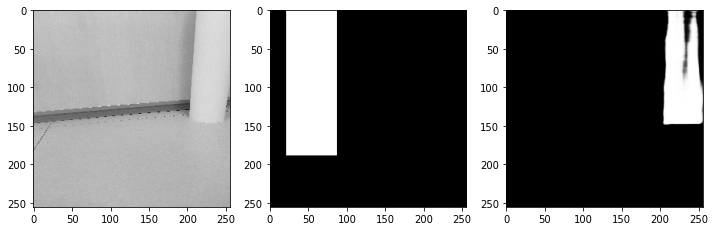

1. Index:  69


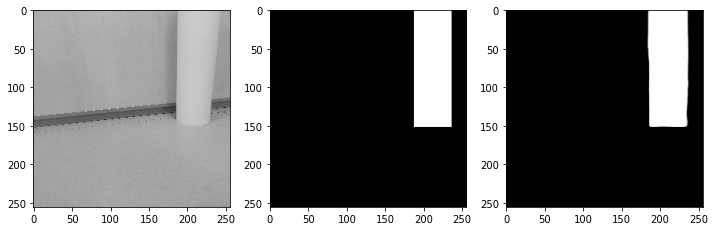

2. Index:  71


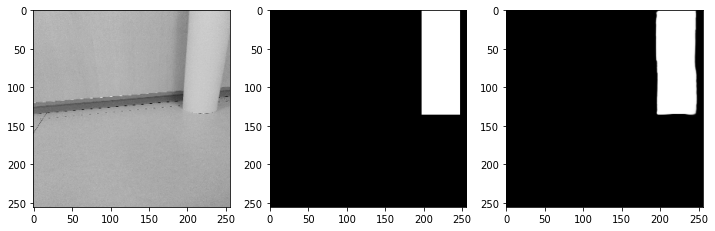

3. Index:  74


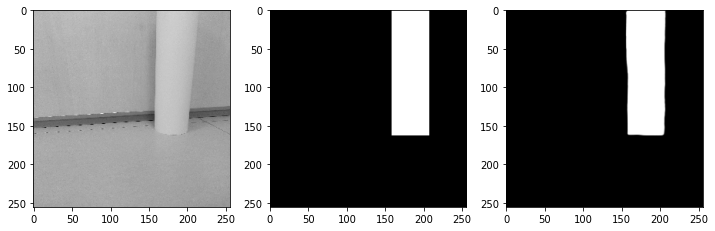

4. Index:  78


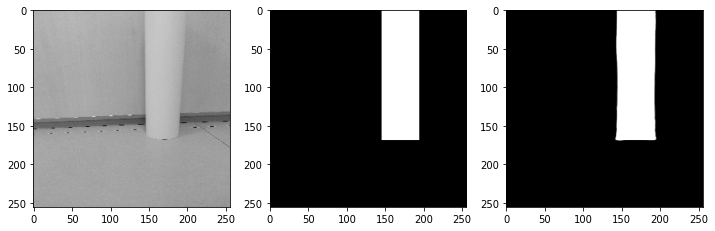

5. Index:  83


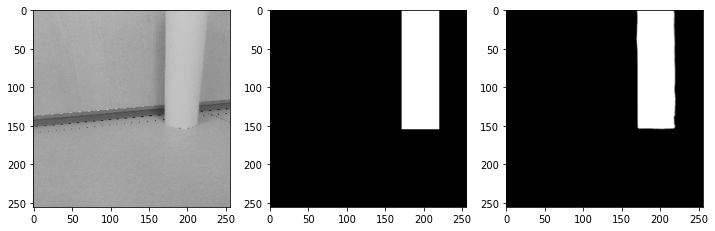

6. Index:  89


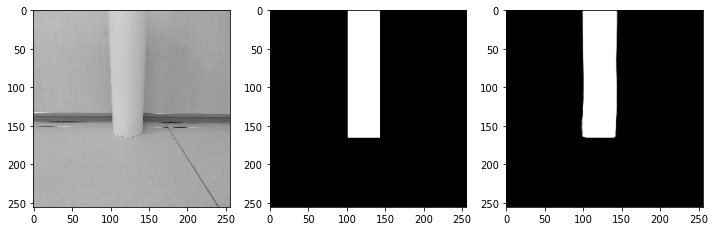

7. Index:  96


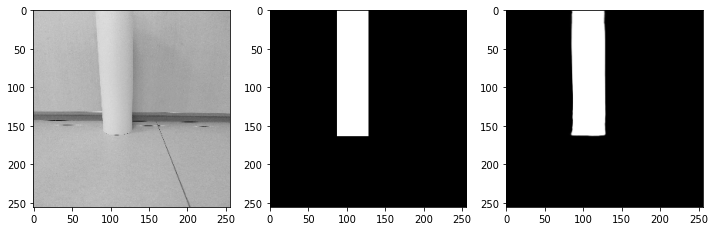

8. Index:  104


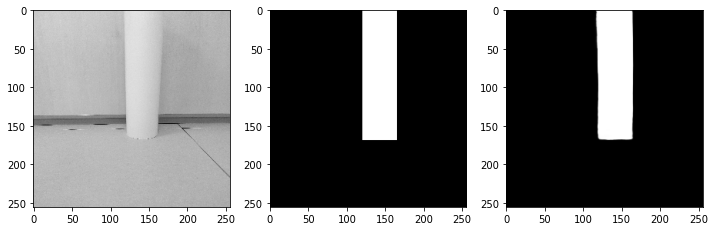

9. Index:  113


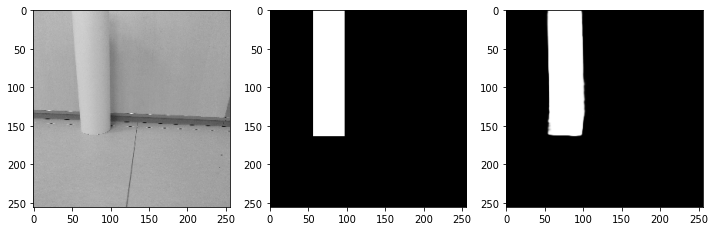

10. Index:  123


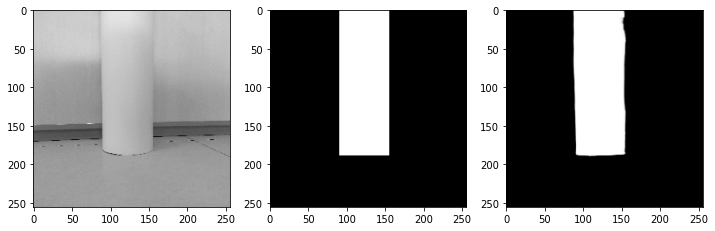

11. Index:  134


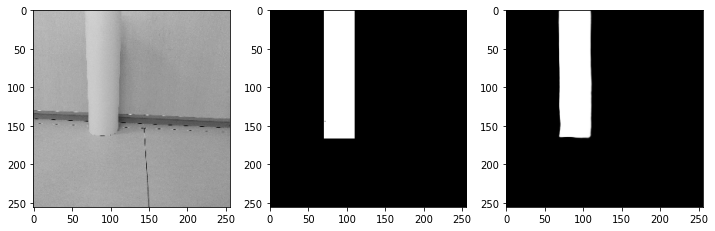

12. Index:  146


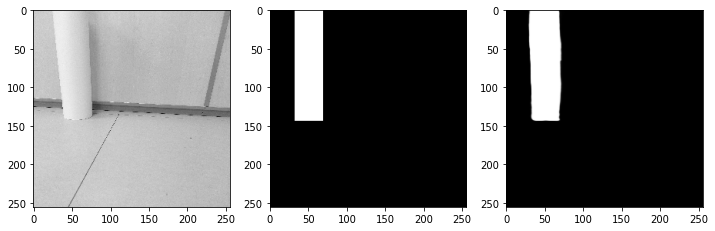

13. Index:  159


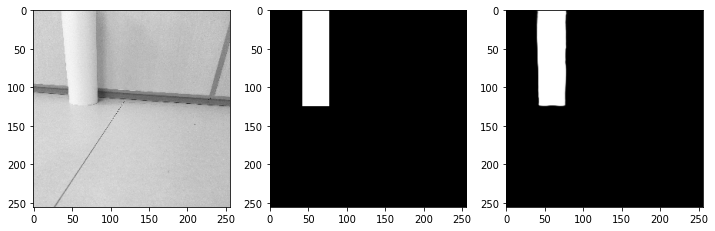

14. Index:  173


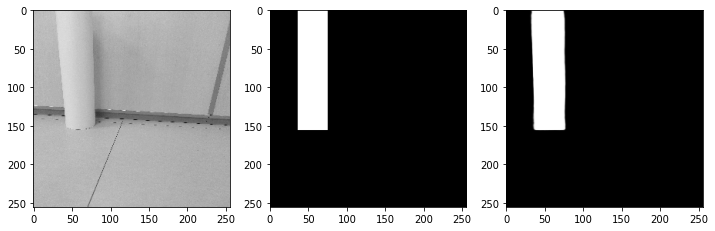

15. Index:  188


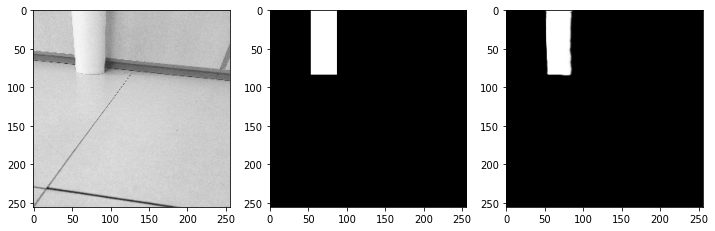

16. Index:  204


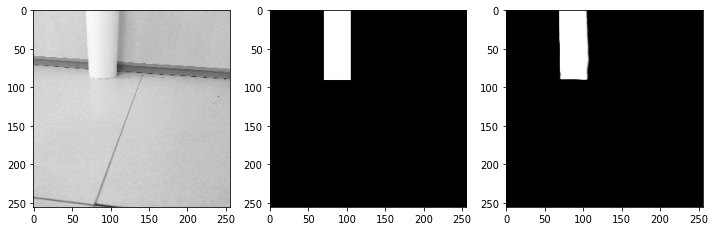

17. Index:  221


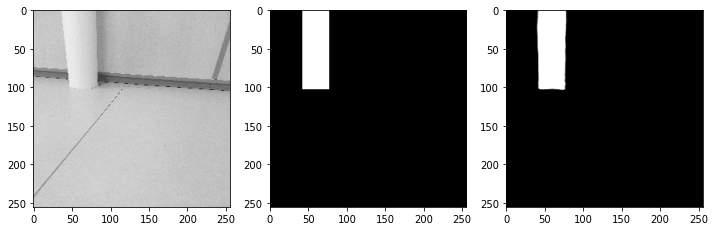

18. Index:  239


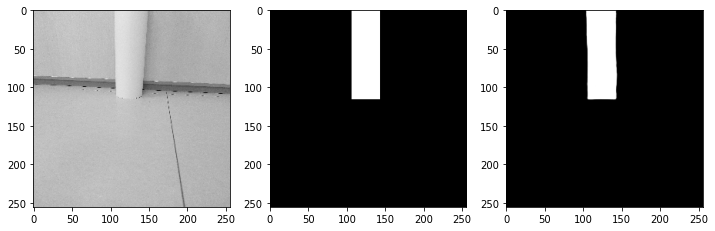

19. Index:  258


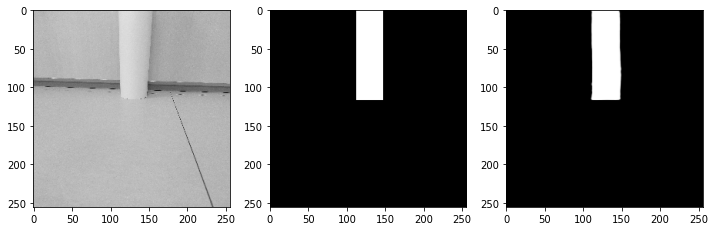

In [19]:
for i in range(len(test_x)):

  index = index + i

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.title = 'Original'
  plt.imshow( test_x[i, :, :, 0], cmap = "gray")
  plt.subplot(132)
  plt.imshow( test_y[i], cmap = "gray")
  plt.subplot(133)
  plt.imshow( prediction[i], cmap = "gray" )
  plt.show()

#### *3.2.2. Cracked pipes*

In [20]:
amount = 20

index = random.randint(0, len(crack_img) - amount - 1)

test_x = crack_img[index:index+amount]
test_y = crack_pipe_roi[index:index+amount]

print("Test X: \t " + str( test_x.shape ) )
print("Test Y: \t " + str( test_y.shape ) )

Test X: 	 (20, 256, 256, 3)
Test Y: 	 (20, 256, 256)


In [21]:
prediction = pipe_model.predict( test_x )
prediction = prediction[:, :, :, 0]

0. Index:  62


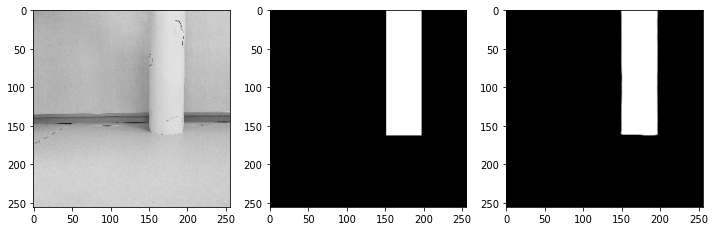

1. Index:  63


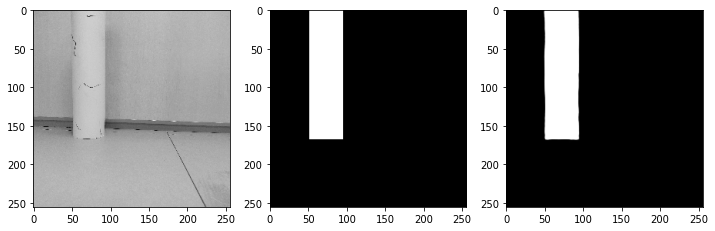

2. Index:  65


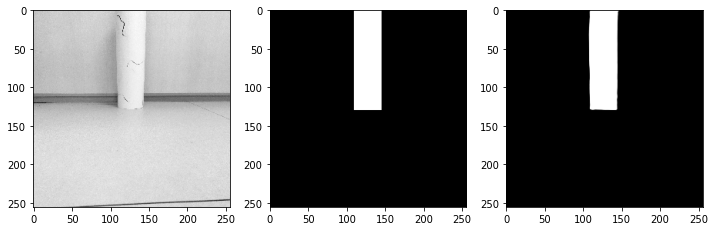

3. Index:  68


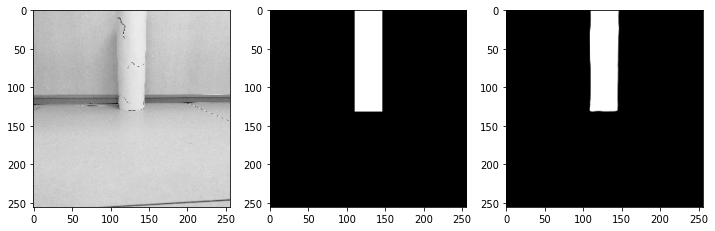

4. Index:  72


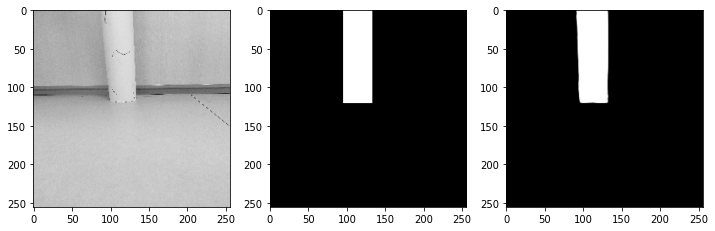

5. Index:  77


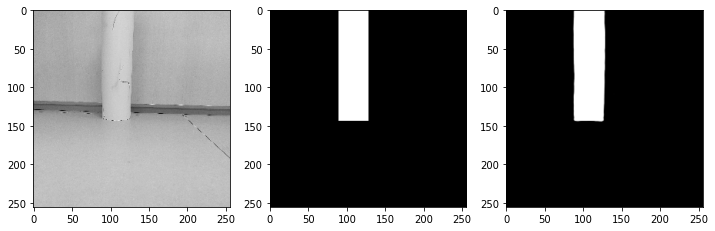

6. Index:  83


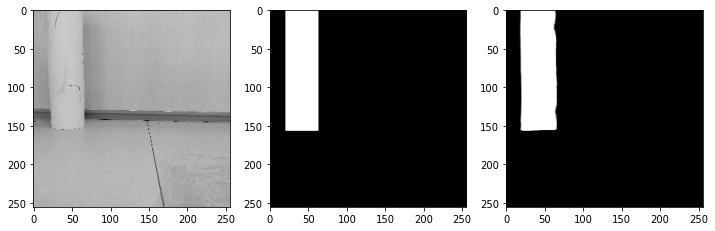

7. Index:  90


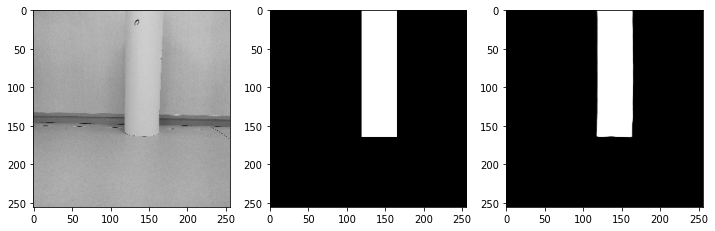

8. Index:  98


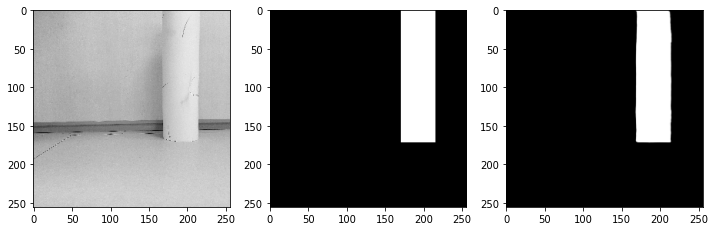

9. Index:  107


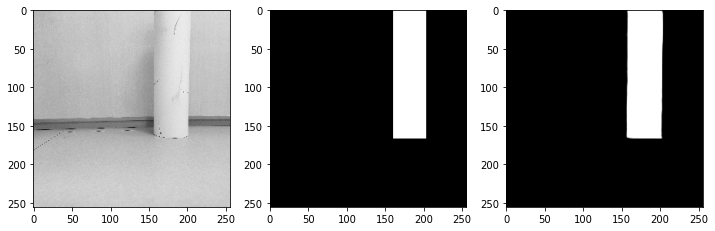

10. Index:  117


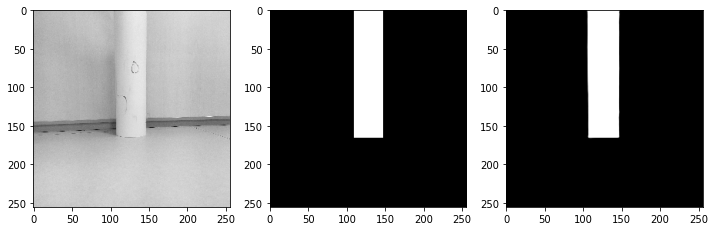

11. Index:  128


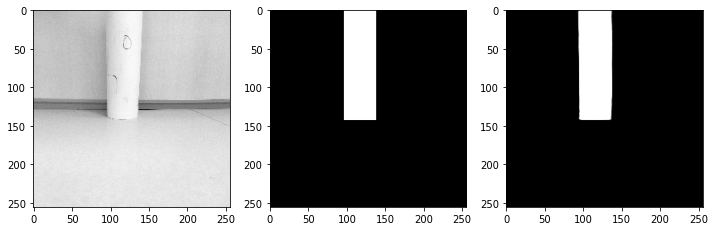

12. Index:  140


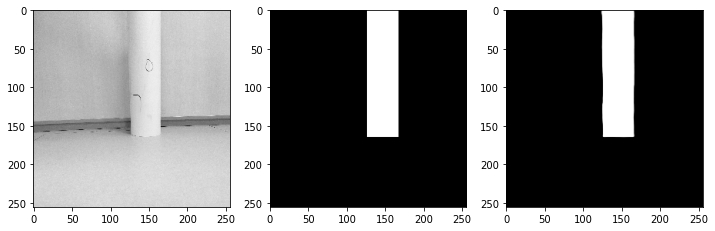

13. Index:  153


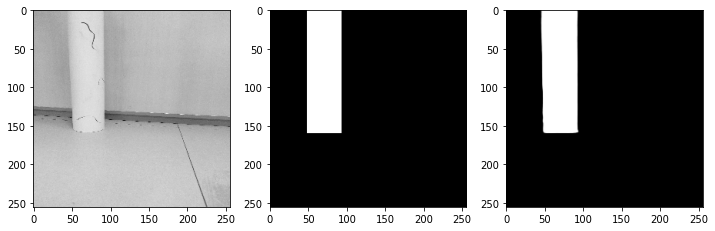

14. Index:  167


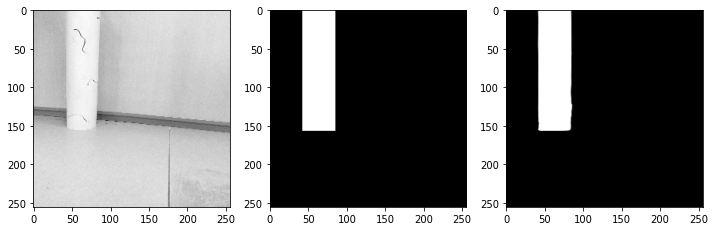

15. Index:  182


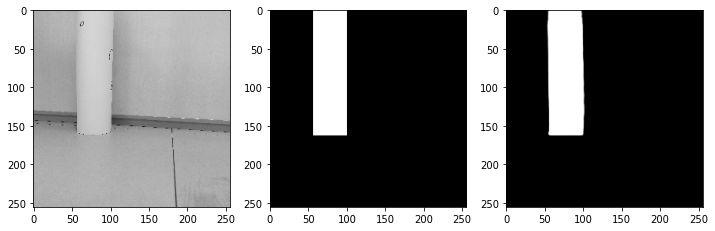

16. Index:  198


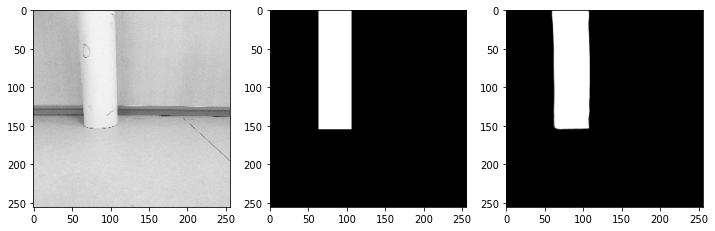

17. Index:  215


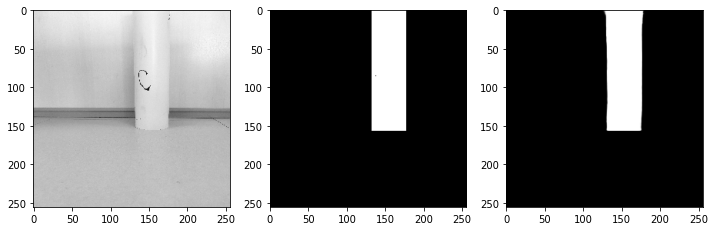

18. Index:  233


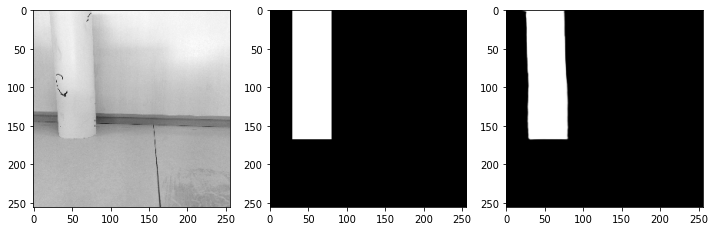

19. Index:  252


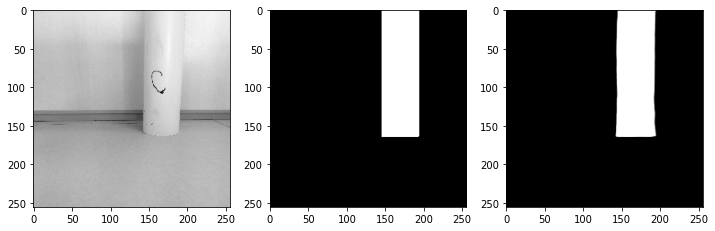

In [22]:
for i in range(len(test_x)):

  index = index + i

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.title = 'Original'
  plt.imshow( test_x[i, :, :, 0], cmap = "gray")
  plt.subplot(132)
  plt.imshow( test_y[i], cmap = "gray")
  plt.subplot(133)
  plt.imshow( prediction[i], cmap = "gray" )
  plt.show()

# **4. Mask generation**

In [39]:
# Data shape, type & range

index = random.randint(0, len(crack_roi) - 1)
print(format.bold + "Splited data:" + format.end)
print("  Pipe images:    \t" + str( pipe_img.shape ) + "\t - " + str( pipe_img.dtype ) )
print("  Pipe ROI:       \t" + str( pipe_roi.shape ) + "\t\t - " + str( pipe_roi.dtype ) )
print("  Crack images:   \t" + str( crack_img.shape ) + "\t - " + str( crack_img.dtype ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi.shape ) + "\t\t - " + str( crack_pipe_roi.dtype ) )
print("  Crack ROI:      \t" + str( crack_roi.shape ) + "\t\t - " + str( crack_roi.dtype ) )
print()
print(format.bold + "Max-Min (" + str(index) + "):" + format.end)
print("  Pipe images:    \t" + str( pipe_img[index, :, :].min() ) + "\t-\t"  + str( pipe_img[index, :, :].max() ) )
print("  Pipe ROI:       \t" + str( pipe_roi[index, :, :].min() ) + "\t-\t"  + str( pipe_roi[index, :, :].max() ) )
print("  Crack images:   \t" + str( crack_img[index, :, :].min() ) + "\t-\t"  + str( crack_img[index, :, :].max() ) )
print("  Crack pipe ROI: \t" + str( crack_pipe_roi[index, :, :].min() ) + "\t-\t"  + str( crack_pipe_roi[index, :, :].max() ) )
print("  Crack ROI:      \t" + str( crack_roi[index, :, :].min() ) + "\t-\t"  + str( crack_roi[index, :, :].max() ) )

Splited data:
  Pipe images:    	(199, 256, 256, 3)	 - float32
  Pipe ROI:       	(199, 256, 256)		 - float32
  Crack images:   	(121, 256, 256, 3)	 - float32
  Crack pipe ROI: 	(121, 256, 256)		 - float32
  Crack ROI:      	(121, 256, 256)		 - float32

Max-Min (117):
  Pipe images:    	0.0	-	214.0
  Pipe ROI:       	0.0	-	1.0
  Crack images:   	1.0	-	228.0
  Crack pipe ROI: 	0.0	-	1.0
  Crack ROI:      	0.0	-	1.0


In [40]:
def mask_image (images, mask):

  size = images.shape
  out_img = np.zeros( images.shape ) + 1

  for img in range( size[0] ):
    for i in range( size[1] ):
      for j in range( size[2] ):
        if mask[img, i, j] > 0.2:
          out_img[img, i, j, :] = images[img, i, j, :]

  return out_img

In [41]:
dataset_x1 = mask_image( pipe_img, pipe_roi )
dataset_y1 = np.zeros( ( dataset_x1.shape[0], dataset_x1.shape[1], dataset_x1.shape[2] ) ) + 1

dataset_x2 = mask_image( crack_img, crack_pipe_roi )
dataset_y2 = crack_roi

In [42]:
print(format.bold + "Dataset X1:  " + format.end + str( dataset_x1.shape ) + "\t - " + str( dataset_x1.dtype ) )
print(format.bold + "Dataset X2:  " + format.end + str( dataset_x2.shape ) + "\t - " + str( dataset_x2.dtype ) )
print(format.bold + "Dataset Y1:  " + format.end + str( dataset_y1.shape ) + "\t - " + str( dataset_y1.dtype ) )
print(format.bold + "Dataset Y2:  " + format.end + str( dataset_y2.shape ) + "\t - " + str( dataset_y2.dtype ) )
print()
print(format.bold + "Dataset X1:  " + format.end + str( dataset_x1[:, :, :].min() ) + "\t-\t"  + str( dataset_x1[:, :, :].max() ) )
print(format.bold + "Dataset X2:  " + format.end + str( dataset_x2[:, :, :].min() ) + "\t-\t"  + str( dataset_x2[:, :, :].max() ) )
print(format.bold + "Dataset Y1:  " + format.end + str( dataset_y1[:, :, :].min() ) + "\t-\t"  + str( dataset_y1[:, :, :].max() ) )
print(format.bold + "Dataset Y2:  " + format.end + str( dataset_y2[:, :, :].min() ) + "\t-\t"  + str( dataset_y2[:, :, :].max() ) )

Dataset X1:  (199, 256, 256, 3)	 - float64
Dataset X2:  (121, 256, 256, 3)	 - float64
Dataset Y1:  (199, 256, 256)	 - float64
Dataset Y2:  (121, 256, 256)	 - float32

Dataset X1:  0.0	-	246.0
Dataset X2:  0.0	-	234.0
Dataset Y1:  1.0	-	1.0
Dataset Y2:  0.0	-	1.0


In [43]:
%%script false

# Data normalization
print(format.bold + "Starting data normalization...." + format.end)

for i in range( dataset_x1.shape[0] ):

  dataset_x1[i] = dataset_x1[i] - dataset_x1[i].min()
  dataset_x1[i] = dataset_x1[i] / dataset_x1[i].max()

for i in range( dataset_x2.shape[0] ):

  dataset_x2[i] = dataset_x2[i] - dataset_x2[i].min()
  dataset_x2[i] = dataset_x2[i] / dataset_x2[i].max()

# Data type selection
data_type = "float32"
dataset_x1 = dataset_x1.astype( data_type )
dataset_x2 = dataset_x2.astype( data_type )
dataset_y1 = dataset_y1.astype( data_type )
dataset_y2 = dataset_y2.astype( data_type )

print("  -> Data normalization finished!")

In [44]:
print(format.bold + "Dataset X1:  " + format.end + str( dataset_x1.shape ) + "\t - " + str( dataset_x1.dtype ) )
print(format.bold + "Dataset X2:  " + format.end + str( dataset_x2.shape ) + "\t - " + str( dataset_x2.dtype ) )
print(format.bold + "Dataset Y1:  " + format.end + str( dataset_y1.shape ) + "\t - " + str( dataset_y1.dtype ) )
print(format.bold + "Dataset Y2:  " + format.end + str( dataset_y2.shape ) + "\t - " + str( dataset_y2.dtype ) )
print()
print(format.bold + "Dataset X1:  " + format.end + str( dataset_x1[:, :, :].min() ) + "\t-\t"  + str( dataset_x1[:, :, :].max() ) )
print(format.bold + "Dataset X2:  " + format.end + str( dataset_x2[:, :, :].min() ) + "\t-\t"  + str( dataset_x2[:, :, :].max() ) )
print(format.bold + "Dataset Y1:  " + format.end + str( dataset_y1[:, :, :].min() ) + "\t-\t"  + str( dataset_y1[:, :, :].max() ) )
print(format.bold + "Dataset Y2:  " + format.end + str( dataset_y2[:, :, :].min() ) + "\t-\t"  + str( dataset_y2[:, :, :].max() ) )

Dataset X1:  (199, 256, 256, 3)	 - float64
Dataset X2:  (121, 256, 256, 3)	 - float64
Dataset Y1:  (199, 256, 256)	 - float64
Dataset Y2:  (121, 256, 256)	 - float32

Dataset X1:  0.0	-	246.0
Dataset X2:  0.0	-	234.0
Dataset Y1:  1.0	-	1.0
Dataset Y2:  0.0	-	1.0


### 4.1. Sanity check

0. Index:  167


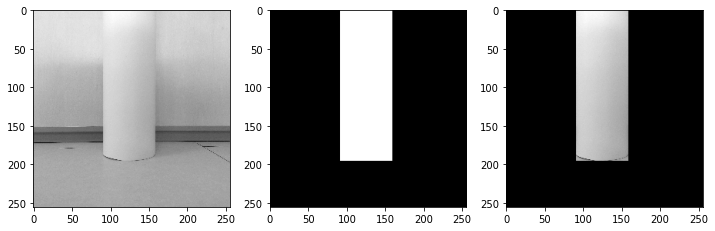

In [45]:
for i in range( 1 ):

  index = random.randint( 0, len(dataset_x1) )

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(131)
  plt.imshow( pipe_img[i, :, :, 0], cmap = "gray")
  plt.subplot(132)
  plt.imshow( pipe_roi[i], cmap = "gray")
  plt.subplot(133)
  plt.imshow( dataset_x1[i, :, :, 0], cmap = "gray")
  plt.show()

0. Index:  33


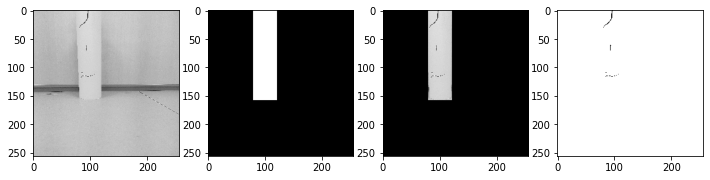

In [46]:
for i in range( 1 ):

  index = random.randint( 0, len(dataset_x2) )

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(141)
  plt.imshow( crack_img[i, :, :, 0], cmap = "gray")
  plt.subplot(142)
  plt.imshow( crack_pipe_roi[i], cmap = "gray")
  plt.subplot(143)
  plt.imshow( dataset_x2[i, :, :, 0], cmap = "gray")
  plt.subplot(144)
  plt.imshow( dataset_y2[i], cmap = "gray" )
  plt.show()

# **5. Crack segmentation**

### 5.1. Load model

In [47]:
%cd '/content/drive/MyDrive/PBL-SecondSemester/DeepLearning/model_data'

def f1(y_true, y_pred):
    metric = tfa.metrics.F1Score(num_classes=3, threshold=0.5)
    metric.update_state(y_true, y_pred)
    return metric.result()


model_name = "crack_segmentation_V1"
crack_model = tf.keras.models.load_model( model_name, compile=False, custom_objects={'f1': f1})

/content/drive/.shortcut-targets-by-id/1LFMENSUeZANGJsWPtbb3BcvK4y9YdVWF/PBL-SecondSemester/DeepLearning/model_data


### 5.2. Take data

In [48]:
amount = 20

index = random.randint(0, len(dataset_x1) - amount - 1)
index_1 = index

tx1 = dataset_x1[index:index+amount]
ty1 = dataset_y1[index:index+amount]

index = random.randint(0, len(dataset_x2) - amount - 1)
index_2 = index

tx2 = dataset_x2[index:index+amount]
ty2 = dataset_y2[index:index+amount]

In [49]:
pred1 = crack_model.predict( tx1 )
pred1 = pred1[:, :, :, 0]

pred2 = crack_model.predict( tx2 )
pred2 = pred2[:, :, :, 0]

In [50]:
print(format.bold + "Test X1: \t" + format.end + str( tx1.shape ) + "\t - " + str( tx1.dtype ) )
print(format.bold + "Test X2: \t" + format.end + str( tx2.shape ) + "\t - " + str( tx2.dtype ) )
print(format.bold + "Test Y1: \t" + format.end + str( ty1.shape ) + "\t\t - " + str( ty1.dtype ) )
print(format.bold + "Test Y2: \t" + format.end + str( ty2.shape ) + "\t\t - " + str( ty2.dtype ) )
print(format.bold + "Pred 1:  \t" + format.end + str( pred1.shape ) + "\t\t - " + str( pred1.dtype ) )
print(format.bold + "Pred 2:  \t" + format.end + str( pred2.shape ) + "\t\t - " + str( pred2.dtype ) )


print()

print(format.bold + "Dataset X1:  " + format.end + str( tx1[:, :, :].min() ) + "\t-\t"  + str( tx1[:, :, :].max() ) )
print(format.bold + "Dataset X2:  " + format.end + str( tx2[:, :, :].min() ) + "\t-\t"  + str( tx2[:, :, :].max() ) )
print(format.bold + "Dataset Y1:  " + format.end + str( ty1[:, :, :].min() ) + "\t-\t"  + str( ty1[:, :, :].max() ) )
print(format.bold + "Dataset Y2:  " + format.end + str( ty2[:, :, :].min() ) + "\t-\t"  + str( ty2[:, :, :].max() ) )
print(format.bold + "Predict 1:   " + format.end + str( pred1[:, :, :].min() ) + "\t-\t"  + str( pred1[:, :, :].max() ) )
print(format.bold + "Predict 2:   " + format.end + str( pred2[:, :, :].min() ) + "\t-\t"  + str( pred2[:, :, :].max() ) )

Test X1: 	(20, 256, 256, 3)	 - float64
Test X2: 	(20, 256, 256, 3)	 - float64
Test Y1: 	(20, 256, 256)		 - float64
Test Y2: 	(20, 256, 256)		 - float32
Pred 1:  	(20, 256, 256)		 - float32
Pred 2:  	(20, 256, 256)		 - float32

Dataset X1:  1.0	-	214.0
Dataset X2:  0.0	-	229.0
Dataset Y1:  1.0	-	1.0
Dataset Y2:  0.0	-	1.0
Predict 1:   0.0	-	1.0
Predict 2:   0.0	-	1.0


### 5.3. Check results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0. Index:  145


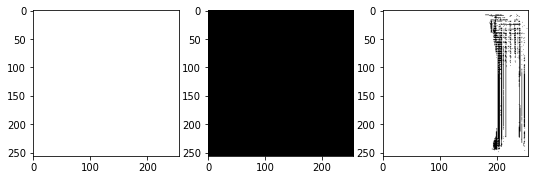

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1. Index:  146


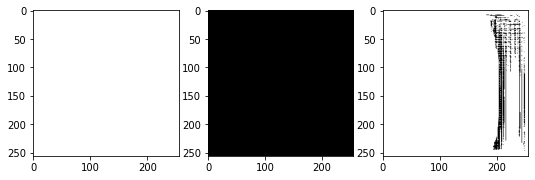

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2. Index:  147


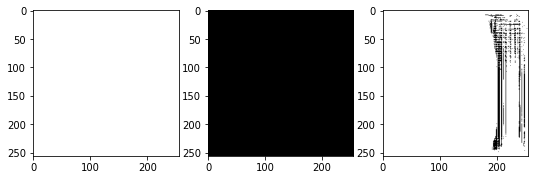

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3. Index:  148


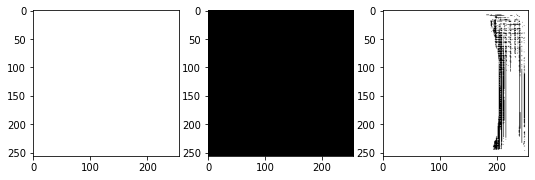

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4. Index:  149


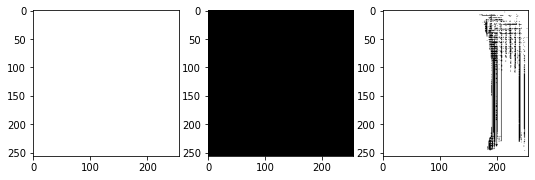

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5. Index:  150


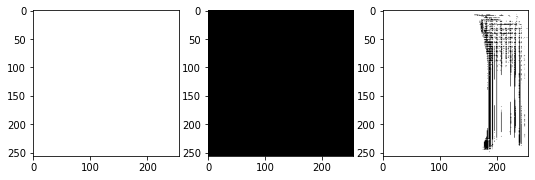

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6. Index:  151


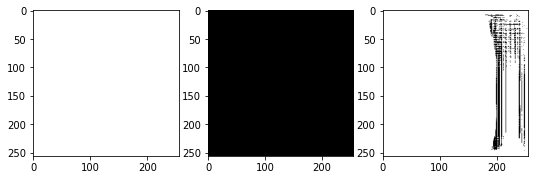

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7. Index:  152


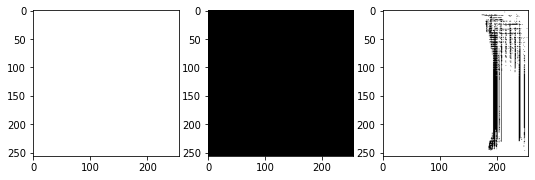

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8. Index:  153


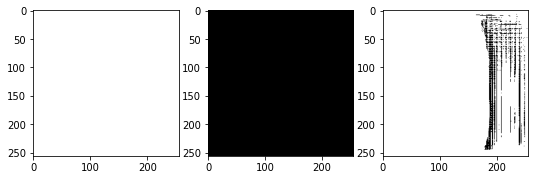

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9. Index:  154


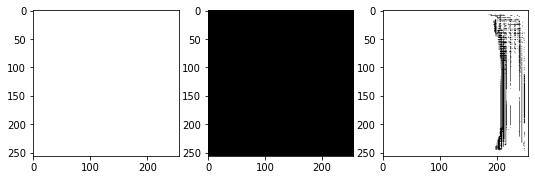

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


10. Index:  155


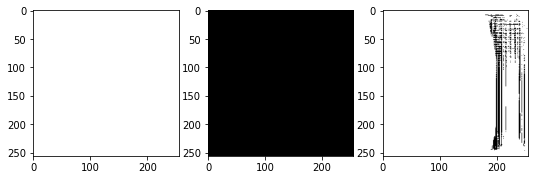

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


11. Index:  156


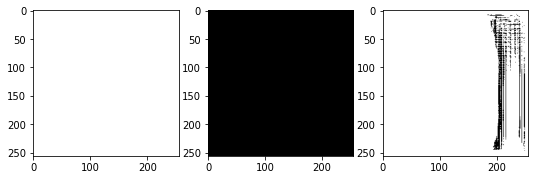

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


12. Index:  157


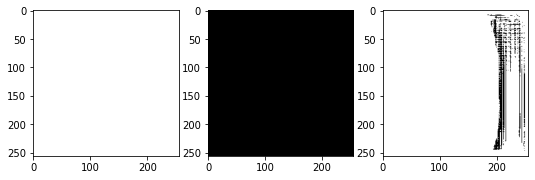

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


13. Index:  158


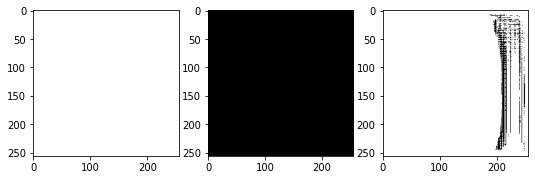

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


14. Index:  159


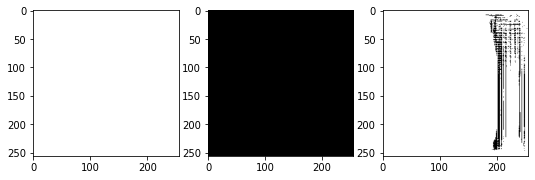

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15. Index:  160


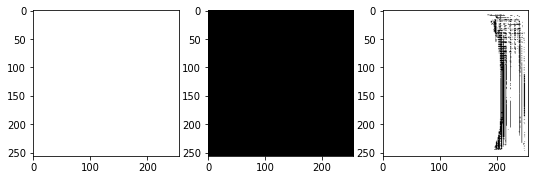

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


16. Index:  161


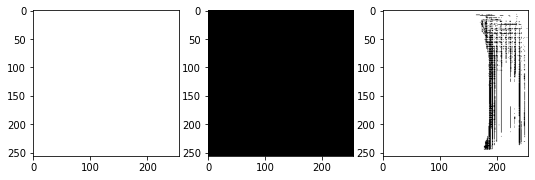

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17. Index:  162


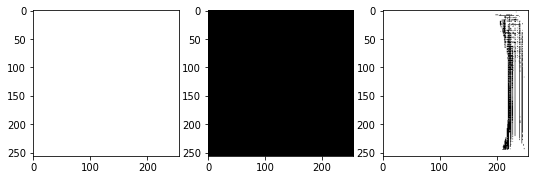

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


18. Index:  163


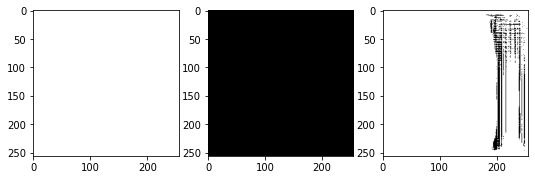

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19. Index:  164


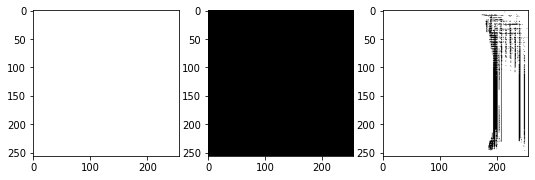

In [51]:
for i in range(len(tx1)):

  index = index_1 + i

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(141)
  plt.imshow( tx1[i] )
  plt.subplot(142)
  plt.imshow( ty1[i], cmap = "gray")
  plt.subplot(143)
  plt.imshow( pred1[i], cmap = "gray" )
  plt.show()

0. Index:  91


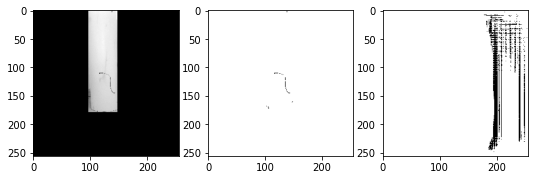

1. Index:  92


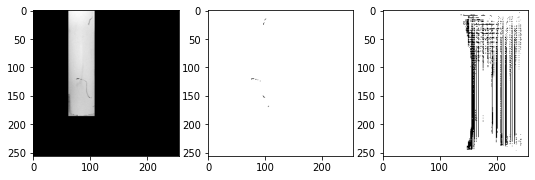

2. Index:  93


In [ ]:
for i in range(len(tx2)):

  index = index_2 + i

  print(format.bold + str(i) + ". Index:  " + format.end + str(index))
  plt.figure(figsize=(12, 6))
  plt.subplot(141)
  plt.imshow( tx2[i, :, :, 0], cmap = "gray")
  plt.subplot(142)
  plt.imshow( ty2[i], cmap = "gray")
  plt.subplot(143)
  plt.imshow( pred2[i], cmap = "gray" )
  plt.show()